In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install q tensorflow==2.2
!pip install q keras==2.3.0
!pip install q imageio==2.5.0
!pip install q imgaug==0.4.0

     |████████████████████████████████| 516.2 MB 4.5 kB/s 
     |████████████████████████████████| 454 kB 45.4 MB/s 
     |████████████████████████████████| 3.0 MB 27.7 MB/s 
     |████████████████████████████████| 2.9 MB 28.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalli

In [ ]:
! pip install git+https://github.com/divamgupta/image-segmentation-keras

  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-5b2oxh74
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-5b2oxh74
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=34556 sha256=9d4b85b08fda0295f0789a046981508637905252cc7b3e441df7c411e9b30985
  Stored in directory: /tmp/pip-ephem-wheel-cache-0q8jci34/wheels/78/73/a2/4ee9fce73985dcc4f889d3d012a4461d58254d0de99197af00
Successfully built keras-segmentation


In [ ]:
import os
import numpy as np
import shutil
#for Deviding into test and train set
root_dir = "/content/drive/MyDrive/dataset1/"
val_ratio = 0.20

# os.makedirs(root_dir +'annotations_prepped_train/')
# os.makedirs(root_dir +'annotations_prepped_val/')
# os.makedirs(root_dir +'images_prepped_train/')
# os.makedirs(root_dir +'images_prepped_val/')

src = root_dir + 'images_prepped_train_val'
allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)

train_FileNames, val_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)* (1 - val_ratio))])
train_FileNames = [ name for name in train_FileNames.tolist()]
val_FileNames   = [ name for name in val_FileNames.tolist()]

print("*****************************")
print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print("*****************************")

for name in train_FileNames:
      img = root_dir + 'images_prepped_train_val/' + name
      shutil.copy(img, root_dir +'images_prepped_train')
      ann = root_dir + 'annotations_prepped_train_val/' + name
      shutil.copy(ann, root_dir + 'annotations_prepped_train')
print("Copying Done!")        
for name in val_FileNames:
      img = root_dir + 'images_prepped_train_val/' + name
      shutil.copy(img, root_dir +'images_prepped_val')
      ann = root_dir + 'images_prepped_train_val/' + name
      shutil.copy(ann, root_dir + 'annotations_prepped_val/')

print("Copying Done!")

*****************************
Total images:  367
Training:  293
Validation:  74
*****************************
Copying Done!
Copying Done!


In [ ]:
from keras_segmentation.models.segnet import vgg_segnet
model = vgg_segnet(n_classes=12 ,   input_height=384, input_width=480  )


Using TensorFlow backend.


58892288/58889256 [==============================] - 1s 0us/step


**Modification in train Function**

In [ ]:
def train(model,
          train_images,
          train_annotations,
          input_height=None,
          input_width=None,
          n_classes=None,
          verify_dataset=True,
          checkpoints_path=None,
          epochs=5,
          batch_size=2,
          validate=False,
          val_images=None,
          val_annotations=None,
          val_batch_size=2,
          auto_resume_checkpoint=False,
          load_weights=None,
          steps_per_epoch=512,
          val_steps_per_epoch=512,
          gen_use_multiprocessing=False,
          ignore_zero_class=False,
          optimizer_name='adam',
          do_augment=False,
          augmentation_name="aug_all",
          callbacks=None,
          custom_augmentation=None,
          other_inputs_paths=None,
          preprocessing=None,
          read_image_type=1 ):
    from .models.all_models import model_from_name
    model = model_from_name[model](n_classes)
    n_classes = model.n_classes
    input_height = model.input_height
    input_width = model.input_width
    output_height = model.output_height
    output_width = model.output_width
    if validate:
        assert val_images is not None
        assert val_annotations is not None
    if optimizer_name is not None:
        if ignore_zero_class:
            loss_k = masked_categorical_crossentropy
        else:
            loss_k = 'categorical_crossentropy'
      METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
]
        model.compile(loss=loss_k,
                      optimizer=optimizer_name,
                      metrics=METRICS)
        model.load_weights(load_weights)
    initial_epoch = 0
    if verify_dataset:
        print("Verifying training dataset")
        verified = verify_segmentation_dataset(train_images,
                                               train_annotations,
                                               n_classes)
        assert verified
        if validate:
            print("Verifying validation dataset")
            verified = verify_segmentation_dataset(val_images,
                                                   val_annotations,
                                                   n_classes)
          assert verified
    train_gen = image_segmentation_generator(
        train_images, train_annotations,  batch_size,  n_classes,
        input_height, input_width, output_height, output_width,
        do_augment=do_augment, augmentation_name=augmentation_name,
        custom_augmentation=custom_augmentation, other_inputs_paths=other_inputs_paths,
        preprocessing=preprocessing, read_image_type=read_image_type)
    if validate:
        val_gen = image_segmentation_generator(
            val_images, val_annotations,  val_batch_size,
            n_classes, input_height, input_width, output_height, output_width,
            other_inputs_paths=other_inputs_paths,
            preprocessing=preprocessing, read_image_type=read_image_type)
    history = model.fit(train_gen,
                  steps_per_epoch=steps_per_epoch,
                  validation_data=val_gen,
                  validation_steps=val_steps_per_epoch,
                  epochs=epochs, callbacks=callbacks,
                  use_multiprocessing=gen_use_multiprocessing, initial_epoch=initial_epoch)
    return history              


In [ ]:
history= model.train(
    train_images =  "/content/drive/MyDrive/dataset1/images_prepped_train/",
    train_annotations = "/content/drive/MyDrive/dataset1/annotations_prepped_train/",
    input_height=384,
    input_width=480,
    n_classes=12,
    do_augment=True,
    val_images="/content/drive/MyDrive/dataset1/images_prepped_val/",
    val_annotations="/content/drive/MyDrive/dataset1/annotations_prepped_val/",
    augmentation_name="aug_all",
    validate = True,
    epochs=100,
    batch_size=2,
    val_batch_size=2,
    steps_per_epoch=146,
    val_steps_per_epoch=37,
)

Verifying training dataset


100%|██████████| 293/293 [00:03<00:00, 73.32it/s]


Dataset verified! 
Verifying validation dataset


100%|██████████| 74/74 [00:01<00:00, 71.92it/s]


Dataset verified! 
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/imgaug/augmenters/segmentation.py:272: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  image, n_segments=n_segments_samples[i], compactness=10)


146/146 [==============================] - 74s 509ms/step - loss: 0.7444 - accuracy: 0.9646 - precision: 0.8468 - recall: 0.7017 - val_loss: 0.5731 - val_accuracy: 0.9660 - val_precision: 0.8543 - val_recall: 0.7141
Epoch 2/100
146/146 [==============================] - 67s 458ms/step - loss: 0.7644 - accuracy: 0.9662 - precision: 0.8559 - recall: 0.7153 - val_loss: 0.7590 - val_accuracy: 0.9662 - val_precision: 0.8551 - val_recall: 0.7151
Epoch 3/100
146/146 [==============================] - 67s 459ms/step - loss: 0.7187 - accuracy: 0.9661 - precision: 0.8542 - recall: 0.7153 - val_loss: 0.6580 - val_accuracy: 0.9664 - val_precision: 0.8558 - val_recall: 0.7182
Epoch 4/100
146/146 [==============================] - 67s 459ms/step - loss: 0.7181 - accuracy: 0.9666 - precision: 0.8563 - recall: 0.7194 - val_loss: 0.5759 - val_accuracy: 0.9668 - val_precision: 0.8572 - val_recall: 0.7219
Epoch 5/100
146/146 [==============================] - 67s 459ms/step - loss: 0.7326 - accuracy: 0.9

In [ ]:
model.save("model2.h5")

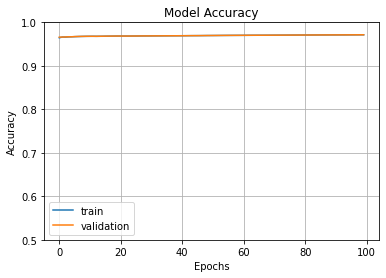

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.5,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show(history)  

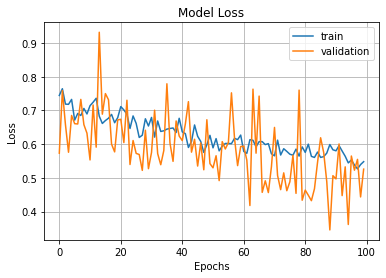

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

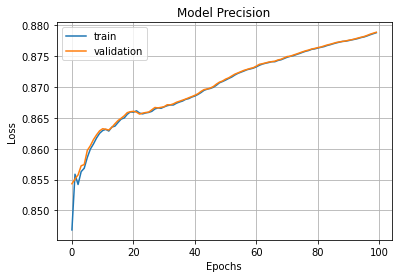

In [ ]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.grid()
plt.title('Model Precision')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

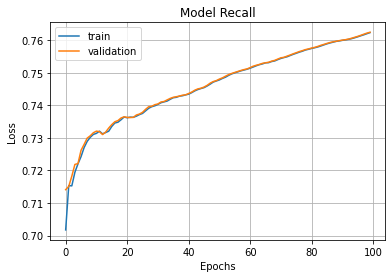

In [ ]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.grid()
plt.title('Model Recall')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

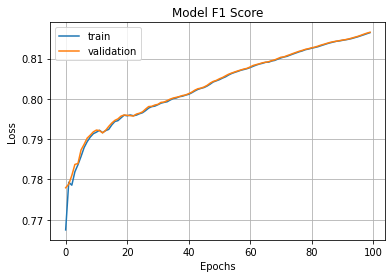

In [ ]:
num = [history.history['precision'][i] * history.history['recall'][i] for i in range(len(history.history['precision']))]
den = [history.history['precision'][i] + history.history['recall'][i] for i in range(len(history.history['precision']))]
f1_score = [2*(num[i] / den[i]) for i in range(len(den))]
num_val = [history.history['val_precision'][i] * history.history['val_recall'][i] for i in range(len(history.history['val_precision']))]
den_val = [history.history['val_precision'][i] + history.history['val_recall'][i] for i in range(len(history.history['val_precision']))]
f1_score_val = [2*(num_val[i] / den_val[i]) for i in range(len(den_val))]

plt.plot(f1_score)
plt.plot(f1_score_val)
plt.grid()
plt.title('Model F1 Score')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
out = model.predict_segmentation(
    inp="/content/drive/MyDrive/dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png"
)

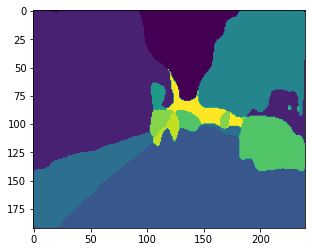

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(out)

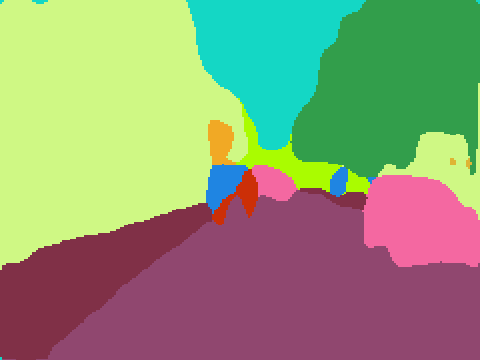

In [ ]:
from IPython.display import Image
Image('/tmp/out.png')

In [ ]:
o = model.predict_segmentation(
    inp="/content/drive/MyDrive/dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky",    "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]

)

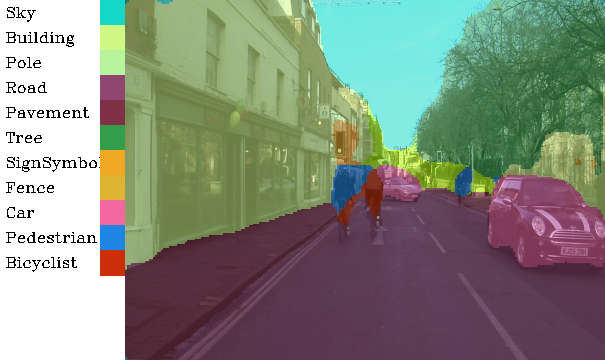

In [ ]:
from IPython.display import Image
Image('/tmp/out.png')